In [4]:
import os

import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision import transforms
from tqdm import tqdm

import dnnlib
from calibration.ece import ECE
from calibration.ReliabilityDiagram import ReliabilityDiagram
from data.classes import CIFAR10_CLASSES
from ema_pytorch import EMA
from training.diffusion import GaussianDiffusion


In [ ]:
c = dnnlib.EasyDict()
c.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

c.test_kwargs = dnnlib.EasyDict(
    test_dir="data/cifar10/test",
    run_dir="training-runs/00021-run",
)

c.model_kwargs = dnnlib.EasyDict(
    class_name="training.networks.EBMUNet",
    img_resolution=32,
    in_channels=3,
    model_channels=192,
    out_channels=10,
    label_dim=10,
    num_res_blocks=3,
    attn_resolutions=(16, 8),
    dropout_rate=0.0,
    channel_mult=(1, 2, 2),
    conv_resample=True,
    dims=2,
    use_checkpoint=False,
    num_heads=4,
    num_head_channels=64,
    num_heads_upsample=-1,
    use_scale_shift_norm=False,
    resblock_updown=False,
    use_new_attention_order=True,
    context_dim=512,
    use_spatial_transformer=True,
    transformer_depth=1,
    pool="sattn",
)
diffusion = GaussianDiffusion(schedule_name="cosine", timesteps=1000)
net = dnnlib.util.construct_class_by_name(**c.model_kwargs)
net = EMA(net).to(c.device).requires_grad_(False)

latest_ckpt = os.path.join(
    c.test_kwargs.run_dir,
    [f for f in os.listdir(c.test_kwargs.run_dir) if f.endswith(".pt")][-1],
)

print("Loading model from", latest_ckpt)
ckpt = torch.load(latest_ckpt, map_location=c.device, weights_only=True)
net.load_state_dict(ckpt["ema"])

c.dataset_kwargs = dnnlib.EasyDict(
    class_name="training.dataset.ImageFolderDataset",
    path=c.test_kwargs.test_dir,
    use_labels=True,
    transform=transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.5] * 3, std=[0.5] * 3),
        ]
    ),
)
dataset_obj = dnnlib.util.construct_class_by_name(**c.dataset_kwargs)

c.dataloader_kwargs = dnnlib.EasyDict(
    class_name="torch.utils.data.DataLoader",
    dataset=dataset_obj,
    batch_size=128,
    num_workers=4,
    pin_memory=True,
    shuffle=False,
)
test_dataloader = dnnlib.util.construct_class_by_name(**c.dataloader_kwargs)

Loading model from training-runs/00021-run/model-000080.pt


RuntimeError: Error(s) in loading state_dict for EMA:
	Missing key(s) in state_dict: "online_model.output_blocks.7.1.conv.weight", "online_model.output_blocks.7.1.conv.bias", "ema_model.output_blocks.7.1.conv.weight", "ema_model.output_blocks.7.1.conv.bias". 
	Unexpected key(s) in state_dict: "online_model.input_blocks.5.1.norm.weight", "online_model.input_blocks.5.1.norm.bias", "online_model.input_blocks.5.1.proj_in.weight", "online_model.input_blocks.5.1.proj_in.bias", "online_model.input_blocks.5.1.transformer_blocks.0.attn1.to_q.weight", "online_model.input_blocks.5.1.transformer_blocks.0.attn1.to_k.weight", "online_model.input_blocks.5.1.transformer_blocks.0.attn1.to_v.weight", "online_model.input_blocks.5.1.transformer_blocks.0.attn1.to_out.0.weight", "online_model.input_blocks.5.1.transformer_blocks.0.attn1.to_out.0.bias", "online_model.input_blocks.5.1.transformer_blocks.0.ff.net.0.proj.weight", "online_model.input_blocks.5.1.transformer_blocks.0.ff.net.0.proj.bias", "online_model.input_blocks.5.1.transformer_blocks.0.ff.net.2.weight", "online_model.input_blocks.5.1.transformer_blocks.0.ff.net.2.bias", "online_model.input_blocks.5.1.transformer_blocks.0.attn2.to_q.weight", "online_model.input_blocks.5.1.transformer_blocks.0.attn2.to_k.weight", "online_model.input_blocks.5.1.transformer_blocks.0.attn2.to_v.weight", "online_model.input_blocks.5.1.transformer_blocks.0.attn2.to_out.0.weight", "online_model.input_blocks.5.1.transformer_blocks.0.attn2.to_out.0.bias", "online_model.input_blocks.5.1.transformer_blocks.0.norm1.weight", "online_model.input_blocks.5.1.transformer_blocks.0.norm1.bias", "online_model.input_blocks.5.1.transformer_blocks.0.norm2.weight", "online_model.input_blocks.5.1.transformer_blocks.0.norm2.bias", "online_model.input_blocks.5.1.transformer_blocks.0.norm3.weight", "online_model.input_blocks.5.1.transformer_blocks.0.norm3.bias", "online_model.input_blocks.5.1.proj_out.weight", "online_model.input_blocks.5.1.proj_out.bias", "online_model.input_blocks.6.1.norm.weight", "online_model.input_blocks.6.1.norm.bias", "online_model.input_blocks.6.1.proj_in.weight", "online_model.input_blocks.6.1.proj_in.bias", "online_model.input_blocks.6.1.transformer_blocks.0.attn1.to_q.weight", "online_model.input_blocks.6.1.transformer_blocks.0.attn1.to_k.weight", "online_model.input_blocks.6.1.transformer_blocks.0.attn1.to_v.weight", "online_model.input_blocks.6.1.transformer_blocks.0.attn1.to_out.0.weight", "online_model.input_blocks.6.1.transformer_blocks.0.attn1.to_out.0.bias", "online_model.input_blocks.6.1.transformer_blocks.0.ff.net.0.proj.weight", "online_model.input_blocks.6.1.transformer_blocks.0.ff.net.0.proj.bias", "online_model.input_blocks.6.1.transformer_blocks.0.ff.net.2.weight", "online_model.input_blocks.6.1.transformer_blocks.0.ff.net.2.bias", "online_model.input_blocks.6.1.transformer_blocks.0.attn2.to_q.weight", "online_model.input_blocks.6.1.transformer_blocks.0.attn2.to_k.weight", "online_model.input_blocks.6.1.transformer_blocks.0.attn2.to_v.weight", "online_model.input_blocks.6.1.transformer_blocks.0.attn2.to_out.0.weight", "online_model.input_blocks.6.1.transformer_blocks.0.attn2.to_out.0.bias", "online_model.input_blocks.6.1.transformer_blocks.0.norm1.weight", "online_model.input_blocks.6.1.transformer_blocks.0.norm1.bias", "online_model.input_blocks.6.1.transformer_blocks.0.norm2.weight", "online_model.input_blocks.6.1.transformer_blocks.0.norm2.bias", "online_model.input_blocks.6.1.transformer_blocks.0.norm3.weight", "online_model.input_blocks.6.1.transformer_blocks.0.norm3.bias", "online_model.input_blocks.6.1.proj_out.weight", "online_model.input_blocks.6.1.proj_out.bias", "online_model.input_blocks.7.1.norm.weight", "online_model.input_blocks.7.1.norm.bias", "online_model.input_blocks.7.1.proj_in.weight", "online_model.input_blocks.7.1.proj_in.bias", "online_model.input_blocks.7.1.transformer_blocks.0.attn1.to_q.weight", "online_model.input_blocks.7.1.transformer_blocks.0.attn1.to_k.weight", "online_model.input_blocks.7.1.transformer_blocks.0.attn1.to_v.weight", "online_model.input_blocks.7.1.transformer_blocks.0.attn1.to_out.0.weight", "online_model.input_blocks.7.1.transformer_blocks.0.attn1.to_out.0.bias", "online_model.input_blocks.7.1.transformer_blocks.0.ff.net.0.proj.weight", "online_model.input_blocks.7.1.transformer_blocks.0.ff.net.0.proj.bias", "online_model.input_blocks.7.1.transformer_blocks.0.ff.net.2.weight", "online_model.input_blocks.7.1.transformer_blocks.0.ff.net.2.bias", "online_model.input_blocks.7.1.transformer_blocks.0.attn2.to_q.weight", "online_model.input_blocks.7.1.transformer_blocks.0.attn2.to_k.weight", "online_model.input_blocks.7.1.transformer_blocks.0.attn2.to_v.weight", "online_model.input_blocks.7.1.transformer_blocks.0.attn2.to_out.0.weight", "online_model.input_blocks.7.1.transformer_blocks.0.attn2.to_out.0.bias", "online_model.input_blocks.7.1.transformer_blocks.0.norm1.weight", "online_model.input_blocks.7.1.transformer_blocks.0.norm1.bias", "online_model.input_blocks.7.1.transformer_blocks.0.norm2.weight", "online_model.input_blocks.7.1.transformer_blocks.0.norm2.bias", "online_model.input_blocks.7.1.transformer_blocks.0.norm3.weight", "online_model.input_blocks.7.1.transformer_blocks.0.norm3.bias", "online_model.input_blocks.7.1.proj_out.weight", "online_model.input_blocks.7.1.proj_out.bias", "online_model.output_blocks.4.1.norm.weight", "online_model.output_blocks.4.1.norm.bias", "online_model.output_blocks.4.1.proj_in.weight", "online_model.output_blocks.4.1.proj_in.bias", "online_model.output_blocks.4.1.transformer_blocks.0.attn1.to_q.weight", "online_model.output_blocks.4.1.transformer_blocks.0.attn1.to_k.weight", "online_model.output_blocks.4.1.transformer_blocks.0.attn1.to_v.weight", "online_model.output_blocks.4.1.transformer_blocks.0.attn1.to_out.0.weight", "online_model.output_blocks.4.1.transformer_blocks.0.attn1.to_out.0.bias", "online_model.output_blocks.4.1.transformer_blocks.0.ff.net.0.proj.weight", "online_model.output_blocks.4.1.transformer_blocks.0.ff.net.0.proj.bias", "online_model.output_blocks.4.1.transformer_blocks.0.ff.net.2.weight", "online_model.output_blocks.4.1.transformer_blocks.0.ff.net.2.bias", "online_model.output_blocks.4.1.transformer_blocks.0.attn2.to_q.weight", "online_model.output_blocks.4.1.transformer_blocks.0.attn2.to_k.weight", "online_model.output_blocks.4.1.transformer_blocks.0.attn2.to_v.weight", "online_model.output_blocks.4.1.transformer_blocks.0.attn2.to_out.0.weight", "online_model.output_blocks.4.1.transformer_blocks.0.attn2.to_out.0.bias", "online_model.output_blocks.4.1.transformer_blocks.0.norm1.weight", "online_model.output_blocks.4.1.transformer_blocks.0.norm1.bias", "online_model.output_blocks.4.1.transformer_blocks.0.norm2.weight", "online_model.output_blocks.4.1.transformer_blocks.0.norm2.bias", "online_model.output_blocks.4.1.transformer_blocks.0.norm3.weight", "online_model.output_blocks.4.1.transformer_blocks.0.norm3.bias", "online_model.output_blocks.4.1.proj_out.weight", "online_model.output_blocks.4.1.proj_out.bias", "online_model.output_blocks.5.1.norm.weight", "online_model.output_blocks.5.1.norm.bias", "online_model.output_blocks.5.1.proj_in.weight", "online_model.output_blocks.5.1.proj_in.bias", "online_model.output_blocks.5.1.transformer_blocks.0.attn1.to_q.weight", "online_model.output_blocks.5.1.transformer_blocks.0.attn1.to_k.weight", "online_model.output_blocks.5.1.transformer_blocks.0.attn1.to_v.weight", "online_model.output_blocks.5.1.transformer_blocks.0.attn1.to_out.0.weight", "online_model.output_blocks.5.1.transformer_blocks.0.attn1.to_out.0.bias", "online_model.output_blocks.5.1.transformer_blocks.0.ff.net.0.proj.weight", "online_model.output_blocks.5.1.transformer_blocks.0.ff.net.0.proj.bias", "online_model.output_blocks.5.1.transformer_blocks.0.ff.net.2.weight", "online_model.output_blocks.5.1.transformer_blocks.0.ff.net.2.bias", "online_model.output_blocks.5.1.transformer_blocks.0.attn2.to_q.weight", "online_model.output_blocks.5.1.transformer_blocks.0.attn2.to_k.weight", "online_model.output_blocks.5.1.transformer_blocks.0.attn2.to_v.weight", "online_model.output_blocks.5.1.transformer_blocks.0.attn2.to_out.0.weight", "online_model.output_blocks.5.1.transformer_blocks.0.attn2.to_out.0.bias", "online_model.output_blocks.5.1.transformer_blocks.0.norm1.weight", "online_model.output_blocks.5.1.transformer_blocks.0.norm1.bias", "online_model.output_blocks.5.1.transformer_blocks.0.norm2.weight", "online_model.output_blocks.5.1.transformer_blocks.0.norm2.bias", "online_model.output_blocks.5.1.transformer_blocks.0.norm3.weight", "online_model.output_blocks.5.1.transformer_blocks.0.norm3.bias", "online_model.output_blocks.5.1.proj_out.weight", "online_model.output_blocks.5.1.proj_out.bias", "online_model.output_blocks.6.1.norm.weight", "online_model.output_blocks.6.1.norm.bias", "online_model.output_blocks.6.1.proj_in.weight", "online_model.output_blocks.6.1.proj_in.bias", "online_model.output_blocks.6.1.transformer_blocks.0.attn1.to_q.weight", "online_model.output_blocks.6.1.transformer_blocks.0.attn1.to_k.weight", "online_model.output_blocks.6.1.transformer_blocks.0.attn1.to_v.weight", "online_model.output_blocks.6.1.transformer_blocks.0.attn1.to_out.0.weight", "online_model.output_blocks.6.1.transformer_blocks.0.attn1.to_out.0.bias", "online_model.output_blocks.6.1.transformer_blocks.0.ff.net.0.proj.weight", "online_model.output_blocks.6.1.transformer_blocks.0.ff.net.0.proj.bias", "online_model.output_blocks.6.1.transformer_blocks.0.ff.net.2.weight", "online_model.output_blocks.6.1.transformer_blocks.0.ff.net.2.bias", "online_model.output_blocks.6.1.transformer_blocks.0.attn2.to_q.weight", "online_model.output_blocks.6.1.transformer_blocks.0.attn2.to_k.weight", "online_model.output_blocks.6.1.transformer_blocks.0.attn2.to_v.weight", "online_model.output_blocks.6.1.transformer_blocks.0.attn2.to_out.0.weight", "online_model.output_blocks.6.1.transformer_blocks.0.attn2.to_out.0.bias", "online_model.output_blocks.6.1.transformer_blocks.0.norm1.weight", "online_model.output_blocks.6.1.transformer_blocks.0.norm1.bias", "online_model.output_blocks.6.1.transformer_blocks.0.norm2.weight", "online_model.output_blocks.6.1.transformer_blocks.0.norm2.bias", "online_model.output_blocks.6.1.transformer_blocks.0.norm3.weight", "online_model.output_blocks.6.1.transformer_blocks.0.norm3.bias", "online_model.output_blocks.6.1.proj_out.weight", "online_model.output_blocks.6.1.proj_out.bias", "online_model.output_blocks.7.2.conv.weight", "online_model.output_blocks.7.2.conv.bias", "online_model.output_blocks.7.1.norm.weight", "online_model.output_blocks.7.1.norm.bias", "online_model.output_blocks.7.1.proj_in.weight", "online_model.output_blocks.7.1.proj_in.bias", "online_model.output_blocks.7.1.transformer_blocks.0.attn1.to_q.weight", "online_model.output_blocks.7.1.transformer_blocks.0.attn1.to_k.weight", "online_model.output_blocks.7.1.transformer_blocks.0.attn1.to_v.weight", "online_model.output_blocks.7.1.transformer_blocks.0.attn1.to_out.0.weight", "online_model.output_blocks.7.1.transformer_blocks.0.attn1.to_out.0.bias", "online_model.output_blocks.7.1.transformer_blocks.0.ff.net.0.proj.weight", "online_model.output_blocks.7.1.transformer_blocks.0.ff.net.0.proj.bias", "online_model.output_blocks.7.1.transformer_blocks.0.ff.net.2.weight", "online_model.output_blocks.7.1.transformer_blocks.0.ff.net.2.bias", "online_model.output_blocks.7.1.transformer_blocks.0.attn2.to_q.weight", "online_model.output_blocks.7.1.transformer_blocks.0.attn2.to_k.weight", "online_model.output_blocks.7.1.transformer_blocks.0.attn2.to_v.weight", "online_model.output_blocks.7.1.transformer_blocks.0.attn2.to_out.0.weight", "online_model.output_blocks.7.1.transformer_blocks.0.attn2.to_out.0.bias", "online_model.output_blocks.7.1.transformer_blocks.0.norm1.weight", "online_model.output_blocks.7.1.transformer_blocks.0.norm1.bias", "online_model.output_blocks.7.1.transformer_blocks.0.norm2.weight", "online_model.output_blocks.7.1.transformer_blocks.0.norm2.bias", "online_model.output_blocks.7.1.transformer_blocks.0.norm3.weight", "online_model.output_blocks.7.1.transformer_blocks.0.norm3.bias", "online_model.output_blocks.7.1.proj_out.weight", "online_model.output_blocks.7.1.proj_out.bias", "ema_model.input_blocks.5.1.norm.weight", "ema_model.input_blocks.5.1.norm.bias", "ema_model.input_blocks.5.1.proj_in.weight", "ema_model.input_blocks.5.1.proj_in.bias", "ema_model.input_blocks.5.1.transformer_blocks.0.attn1.to_q.weight", "ema_model.input_blocks.5.1.transformer_blocks.0.attn1.to_k.weight", "ema_model.input_blocks.5.1.transformer_blocks.0.attn1.to_v.weight", "ema_model.input_blocks.5.1.transformer_blocks.0.attn1.to_out.0.weight", "ema_model.input_blocks.5.1.transformer_blocks.0.attn1.to_out.0.bias", "ema_model.input_blocks.5.1.transformer_blocks.0.ff.net.0.proj.weight", "ema_model.input_blocks.5.1.transformer_blocks.0.ff.net.0.proj.bias", "ema_model.input_blocks.5.1.transformer_blocks.0.ff.net.2.weight", "ema_model.input_blocks.5.1.transformer_blocks.0.ff.net.2.bias", "ema_model.input_blocks.5.1.transformer_blocks.0.attn2.to_q.weight", "ema_model.input_blocks.5.1.transformer_blocks.0.attn2.to_k.weight", "ema_model.input_blocks.5.1.transformer_blocks.0.attn2.to_v.weight", "ema_model.input_blocks.5.1.transformer_blocks.0.attn2.to_out.0.weight", "ema_model.input_blocks.5.1.transformer_blocks.0.attn2.to_out.0.bias", "ema_model.input_blocks.5.1.transformer_blocks.0.norm1.weight", "ema_model.input_blocks.5.1.transformer_blocks.0.norm1.bias", "ema_model.input_blocks.5.1.transformer_blocks.0.norm2.weight", "ema_model.input_blocks.5.1.transformer_blocks.0.norm2.bias", "ema_model.input_blocks.5.1.transformer_blocks.0.norm3.weight", "ema_model.input_blocks.5.1.transformer_blocks.0.norm3.bias", "ema_model.input_blocks.5.1.proj_out.weight", "ema_model.input_blocks.5.1.proj_out.bias", "ema_model.input_blocks.6.1.norm.weight", "ema_model.input_blocks.6.1.norm.bias", "ema_model.input_blocks.6.1.proj_in.weight", "ema_model.input_blocks.6.1.proj_in.bias", "ema_model.input_blocks.6.1.transformer_blocks.0.attn1.to_q.weight", "ema_model.input_blocks.6.1.transformer_blocks.0.attn1.to_k.weight", "ema_model.input_blocks.6.1.transformer_blocks.0.attn1.to_v.weight", "ema_model.input_blocks.6.1.transformer_blocks.0.attn1.to_out.0.weight", "ema_model.input_blocks.6.1.transformer_blocks.0.attn1.to_out.0.bias", "ema_model.input_blocks.6.1.transformer_blocks.0.ff.net.0.proj.weight", "ema_model.input_blocks.6.1.transformer_blocks.0.ff.net.0.proj.bias", "ema_model.input_blocks.6.1.transformer_blocks.0.ff.net.2.weight", "ema_model.input_blocks.6.1.transformer_blocks.0.ff.net.2.bias", "ema_model.input_blocks.6.1.transformer_blocks.0.attn2.to_q.weight", "ema_model.input_blocks.6.1.transformer_blocks.0.attn2.to_k.weight", "ema_model.input_blocks.6.1.transformer_blocks.0.attn2.to_v.weight", "ema_model.input_blocks.6.1.transformer_blocks.0.attn2.to_out.0.weight", "ema_model.input_blocks.6.1.transformer_blocks.0.attn2.to_out.0.bias", "ema_model.input_blocks.6.1.transformer_blocks.0.norm1.weight", "ema_model.input_blocks.6.1.transformer_blocks.0.norm1.bias", "ema_model.input_blocks.6.1.transformer_blocks.0.norm2.weight", "ema_model.input_blocks.6.1.transformer_blocks.0.norm2.bias", "ema_model.input_blocks.6.1.transformer_blocks.0.norm3.weight", "ema_model.input_blocks.6.1.transformer_blocks.0.norm3.bias", "ema_model.input_blocks.6.1.proj_out.weight", "ema_model.input_blocks.6.1.proj_out.bias", "ema_model.input_blocks.7.1.norm.weight", "ema_model.input_blocks.7.1.norm.bias", "ema_model.input_blocks.7.1.proj_in.weight", "ema_model.input_blocks.7.1.proj_in.bias", "ema_model.input_blocks.7.1.transformer_blocks.0.attn1.to_q.weight", "ema_model.input_blocks.7.1.transformer_blocks.0.attn1.to_k.weight", "ema_model.input_blocks.7.1.transformer_blocks.0.attn1.to_v.weight", "ema_model.input_blocks.7.1.transformer_blocks.0.attn1.to_out.0.weight", "ema_model.input_blocks.7.1.transformer_blocks.0.attn1.to_out.0.bias", "ema_model.input_blocks.7.1.transformer_blocks.0.ff.net.0.proj.weight", "ema_model.input_blocks.7.1.transformer_blocks.0.ff.net.0.proj.bias", "ema_model.input_blocks.7.1.transformer_blocks.0.ff.net.2.weight", "ema_model.input_blocks.7.1.transformer_blocks.0.ff.net.2.bias", "ema_model.input_blocks.7.1.transformer_blocks.0.attn2.to_q.weight", "ema_model.input_blocks.7.1.transformer_blocks.0.attn2.to_k.weight", "ema_model.input_blocks.7.1.transformer_blocks.0.attn2.to_v.weight", "ema_model.input_blocks.7.1.transformer_blocks.0.attn2.to_out.0.weight", "ema_model.input_blocks.7.1.transformer_blocks.0.attn2.to_out.0.bias", "ema_model.input_blocks.7.1.transformer_blocks.0.norm1.weight", "ema_model.input_blocks.7.1.transformer_blocks.0.norm1.bias", "ema_model.input_blocks.7.1.transformer_blocks.0.norm2.weight", "ema_model.input_blocks.7.1.transformer_blocks.0.norm2.bias", "ema_model.input_blocks.7.1.transformer_blocks.0.norm3.weight", "ema_model.input_blocks.7.1.transformer_blocks.0.norm3.bias", "ema_model.input_blocks.7.1.proj_out.weight", "ema_model.input_blocks.7.1.proj_out.bias", "ema_model.output_blocks.4.1.norm.weight", "ema_model.output_blocks.4.1.norm.bias", "ema_model.output_blocks.4.1.proj_in.weight", "ema_model.output_blocks.4.1.proj_in.bias", "ema_model.output_blocks.4.1.transformer_blocks.0.attn1.to_q.weight", "ema_model.output_blocks.4.1.transformer_blocks.0.attn1.to_k.weight", "ema_model.output_blocks.4.1.transformer_blocks.0.attn1.to_v.weight", "ema_model.output_blocks.4.1.transformer_blocks.0.attn1.to_out.0.weight", "ema_model.output_blocks.4.1.transformer_blocks.0.attn1.to_out.0.bias", "ema_model.output_blocks.4.1.transformer_blocks.0.ff.net.0.proj.weight", "ema_model.output_blocks.4.1.transformer_blocks.0.ff.net.0.proj.bias", "ema_model.output_blocks.4.1.transformer_blocks.0.ff.net.2.weight", "ema_model.output_blocks.4.1.transformer_blocks.0.ff.net.2.bias", "ema_model.output_blocks.4.1.transformer_blocks.0.attn2.to_q.weight", "ema_model.output_blocks.4.1.transformer_blocks.0.attn2.to_k.weight", "ema_model.output_blocks.4.1.transformer_blocks.0.attn2.to_v.weight", "ema_model.output_blocks.4.1.transformer_blocks.0.attn2.to_out.0.weight", "ema_model.output_blocks.4.1.transformer_blocks.0.attn2.to_out.0.bias", "ema_model.output_blocks.4.1.transformer_blocks.0.norm1.weight", "ema_model.output_blocks.4.1.transformer_blocks.0.norm1.bias", "ema_model.output_blocks.4.1.transformer_blocks.0.norm2.weight", "ema_model.output_blocks.4.1.transformer_blocks.0.norm2.bias", "ema_model.output_blocks.4.1.transformer_blocks.0.norm3.weight", "ema_model.output_blocks.4.1.transformer_blocks.0.norm3.bias", "ema_model.output_blocks.4.1.proj_out.weight", "ema_model.output_blocks.4.1.proj_out.bias", "ema_model.output_blocks.5.1.norm.weight", "ema_model.output_blocks.5.1.norm.bias", "ema_model.output_blocks.5.1.proj_in.weight", "ema_model.output_blocks.5.1.proj_in.bias", "ema_model.output_blocks.5.1.transformer_blocks.0.attn1.to_q.weight", "ema_model.output_blocks.5.1.transformer_blocks.0.attn1.to_k.weight", "ema_model.output_blocks.5.1.transformer_blocks.0.attn1.to_v.weight", "ema_model.output_blocks.5.1.transformer_blocks.0.attn1.to_out.0.weight", "ema_model.output_blocks.5.1.transformer_blocks.0.attn1.to_out.0.bias", "ema_model.output_blocks.5.1.transformer_blocks.0.ff.net.0.proj.weight", "ema_model.output_blocks.5.1.transformer_blocks.0.ff.net.0.proj.bias", "ema_model.output_blocks.5.1.transformer_blocks.0.ff.net.2.weight", "ema_model.output_blocks.5.1.transformer_blocks.0.ff.net.2.bias", "ema_model.output_blocks.5.1.transformer_blocks.0.attn2.to_q.weight", "ema_model.output_blocks.5.1.transformer_blocks.0.attn2.to_k.weight", "ema_model.output_blocks.5.1.transformer_blocks.0.attn2.to_v.weight", "ema_model.output_blocks.5.1.transformer_blocks.0.attn2.to_out.0.weight", "ema_model.output_blocks.5.1.transformer_blocks.0.attn2.to_out.0.bias", "ema_model.output_blocks.5.1.transformer_blocks.0.norm1.weight", "ema_model.output_blocks.5.1.transformer_blocks.0.norm1.bias", "ema_model.output_blocks.5.1.transformer_blocks.0.norm2.weight", "ema_model.output_blocks.5.1.transformer_blocks.0.norm2.bias", "ema_model.output_blocks.5.1.transformer_blocks.0.norm3.weight", "ema_model.output_blocks.5.1.transformer_blocks.0.norm3.bias", "ema_model.output_blocks.5.1.proj_out.weight", "ema_model.output_blocks.5.1.proj_out.bias", "ema_model.output_blocks.6.1.norm.weight", "ema_model.output_blocks.6.1.norm.bias", "ema_model.output_blocks.6.1.proj_in.weight", "ema_model.output_blocks.6.1.proj_in.bias", "ema_model.output_blocks.6.1.transformer_blocks.0.attn1.to_q.weight", "ema_model.output_blocks.6.1.transformer_blocks.0.attn1.to_k.weight", "ema_model.output_blocks.6.1.transformer_blocks.0.attn1.to_v.weight", "ema_model.output_blocks.6.1.transformer_blocks.0.attn1.to_out.0.weight", "ema_model.output_blocks.6.1.transformer_blocks.0.attn1.to_out.0.bias", "ema_model.output_blocks.6.1.transformer_blocks.0.ff.net.0.proj.weight", "ema_model.output_blocks.6.1.transformer_blocks.0.ff.net.0.proj.bias", "ema_model.output_blocks.6.1.transformer_blocks.0.ff.net.2.weight", "ema_model.output_blocks.6.1.transformer_blocks.0.ff.net.2.bias", "ema_model.output_blocks.6.1.transformer_blocks.0.attn2.to_q.weight", "ema_model.output_blocks.6.1.transformer_blocks.0.attn2.to_k.weight", "ema_model.output_blocks.6.1.transformer_blocks.0.attn2.to_v.weight", "ema_model.output_blocks.6.1.transformer_blocks.0.attn2.to_out.0.weight", "ema_model.output_blocks.6.1.transformer_blocks.0.attn2.to_out.0.bias", "ema_model.output_blocks.6.1.transformer_blocks.0.norm1.weight", "ema_model.output_blocks.6.1.transformer_blocks.0.norm1.bias", "ema_model.output_blocks.6.1.transformer_blocks.0.norm2.weight", "ema_model.output_blocks.6.1.transformer_blocks.0.norm2.bias", "ema_model.output_blocks.6.1.transformer_blocks.0.norm3.weight", "ema_model.output_blocks.6.1.transformer_blocks.0.norm3.bias", "ema_model.output_blocks.6.1.proj_out.weight", "ema_model.output_blocks.6.1.proj_out.bias", "ema_model.output_blocks.7.2.conv.weight", "ema_model.output_blocks.7.2.conv.bias", "ema_model.output_blocks.7.1.norm.weight", "ema_model.output_blocks.7.1.norm.bias", "ema_model.output_blocks.7.1.proj_in.weight", "ema_model.output_blocks.7.1.proj_in.bias", "ema_model.output_blocks.7.1.transformer_blocks.0.attn1.to_q.weight", "ema_model.output_blocks.7.1.transformer_blocks.0.attn1.to_k.weight", "ema_model.output_blocks.7.1.transformer_blocks.0.attn1.to_v.weight", "ema_model.output_blocks.7.1.transformer_blocks.0.attn1.to_out.0.weight", "ema_model.output_blocks.7.1.transformer_blocks.0.attn1.to_out.0.bias", "ema_model.output_blocks.7.1.transformer_blocks.0.ff.net.0.proj.weight", "ema_model.output_blocks.7.1.transformer_blocks.0.ff.net.0.proj.bias", "ema_model.output_blocks.7.1.transformer_blocks.0.ff.net.2.weight", "ema_model.output_blocks.7.1.transformer_blocks.0.ff.net.2.bias", "ema_model.output_blocks.7.1.transformer_blocks.0.attn2.to_q.weight", "ema_model.output_blocks.7.1.transformer_blocks.0.attn2.to_k.weight", "ema_model.output_blocks.7.1.transformer_blocks.0.attn2.to_v.weight", "ema_model.output_blocks.7.1.transformer_blocks.0.attn2.to_out.0.weight", "ema_model.output_blocks.7.1.transformer_blocks.0.attn2.to_out.0.bias", "ema_model.output_blocks.7.1.transformer_blocks.0.norm1.weight", "ema_model.output_blocks.7.1.transformer_blocks.0.norm1.bias", "ema_model.output_blocks.7.1.transformer_blocks.0.norm2.weight", "ema_model.output_blocks.7.1.transformer_blocks.0.norm2.bias", "ema_model.output_blocks.7.1.transformer_blocks.0.norm3.weight", "ema_model.output_blocks.7.1.transformer_blocks.0.norm3.bias", "ema_model.output_blocks.7.1.proj_out.weight", "ema_model.output_blocks.7.1.proj_out.bias". 

In [ ]:
shape = (16, 3, 32, 32)
y = torch.randint(low=0, high=10, size=(shape[0],))
samples = diffusion.sample(net, shape, y, guidance_scale=6.0)

AttributeError: 'GaussianDiffusion' object has no attribute 'sample'

In [ ]:
def evaluate(net, dataloader, device, return_outputs=False):
    """Evaluate the model on the given dataset.

    :param net: The model to evaluate
    :param dataloader: The DataLoader object to use for evaluation
    :param device: The device to use for evaluation
    :param return_outputs: Whether to return the outputs or not

    :return: Tuple of (loss, accuracy, ece) or (loss, accuracy, ece, gts, confs, preds)
    """

    loss_total, correct_total, samples_total = 0, 0, 0
    ece_total = 0

    gts_all, confs_all, preds_all = [], [], []

    ce_loss = torch.nn.CrossEntropyLoss(reduction="sum")
    ece_loss = ECE()

    net.eval()

    with torch.no_grad():
        for images, labels in tqdm(dataloader, desc="Evaluating", leave=False):
            images, labels = images.to(device), labels.to(device)
            batch_size = images.size(0)
            samples_total += batch_size

            clean_timesteps = torch.zeros(batch_size, dtype=torch.long, device=device)
            logits = net(images, clean_timesteps, cls_mode=True)

            labels = labels.argmax(dim=1)
            loss = ce_loss(logits, labels)
            loss_total += loss.item()

            probs = torch.nn.functional.softmax(logits, dim=1)
            conf, pred = probs.max(dim=1)

            conf_one_hot = torch.zeros_like(probs).scatter_(
                1, pred.unsqueeze(1), conf.unsqueeze(1)
            )

            correct_total += (pred == labels).sum().item()
            ece_total += ece_loss.measure(probs.cpu().numpy(), labels.cpu().numpy())

            if return_outputs:
                gts_all.append(labels.cpu())
                confs_all.append(conf_one_hot.cpu())
                preds_all.append(pred.cpu())

    loss_avg = loss_total / samples_total
    acc_acg = correct_total / samples_total
    ece_avg = ece_total / len(dataloader)

    if return_outputs:
        return (
            loss_avg,
            acc_acg,
            ece_avg,
            np.concatenate(gts_all),
            np.concatenate(confs_all),
            np.concatenate(preds_all),
        )
    return loss_avg, acc_acg, ece_avg

In [ ]:
test_loss, test_acc, test_ece, gts, confs, preds = evaluate(
    net,
    test_dataloader,
    c.device,
    return_outputs=True,
)

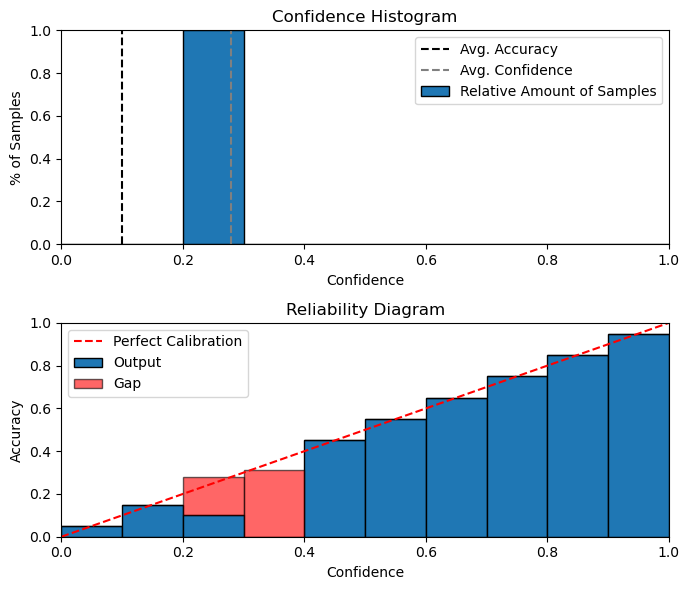

In [ ]:
diagram = ReliabilityDiagram()
diagram.plot(confs, gts)
plt.show()

In [ ]:
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test ECE: {test_ece:.4f}")

Test Loss: 2.5834
Test Accuracy: 0.1000
Test ECE: 0.1794


In [ ]:
images, labels = [], []
for i, (image, label) in enumerate(test_dataloader):
    images.append(image)
    labels.append(label)

images = torch.cat(images)
labels = torch.cat(labels).argmax(dim=1).cpu().numpy()

In [ ]:
def plot_samples(
    images: torch.Tensor,
    gts: np.ndarray,
    confs: np.ndarray,
    preds: np.ndarray,
    num_samples: int = 16,
):
    """Plot random samples from the dataset with predictions and confidences.

    :param images: Tensor of shape (N, C, H, W) containing images.
    :param gts: Tensor of shape (N,) containing ground truth labels.
    :param confs: Tensor of shape (N, C) containing confidences.
    :param preds: Tensor of shape (N,) containing predicted labels.
    :param num_samples: Number of samples to plot. Default is 16.
    """

    # Randomly choose num_sample indices from images, gts, preds, and confs
    indices = np.random.choice(len(images), num_samples, replace=False)

    images = images[indices]
    gts = gts[indices]
    preds = preds[indices]
    confs = confs[indices].max(axis=1)

    num_images = len(images)
    num_cols = 4
    num_rows = (num_images + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10), dpi=150)
    axes = axes.flatten()

    for i in range(num_images):
        ax = axes[i]
        img = images[i].permute(1, 2, 0).numpy() * 0.5 + 0.5
        img = np.clip(img, 0, 1)

        pred_name = CIFAR10_CLASSES[preds[i]]
        true_name = CIFAR10_CLASSES[gts[i]]

        # Add color to title based on correctness
        color = "green" if preds[i] == gts[i] else "red"

        ax.imshow(img)
        ax.set_title(
            f"Pred: {pred_name}\nTrue: {true_name}\nConf: {confs[i]:.2f}",
            color=color,
        )
        ax.axis("off")

    for i in range(num_images, len(axes)):
        axes[i].axis("off")

    plt.tight_layout()
    plt.show()

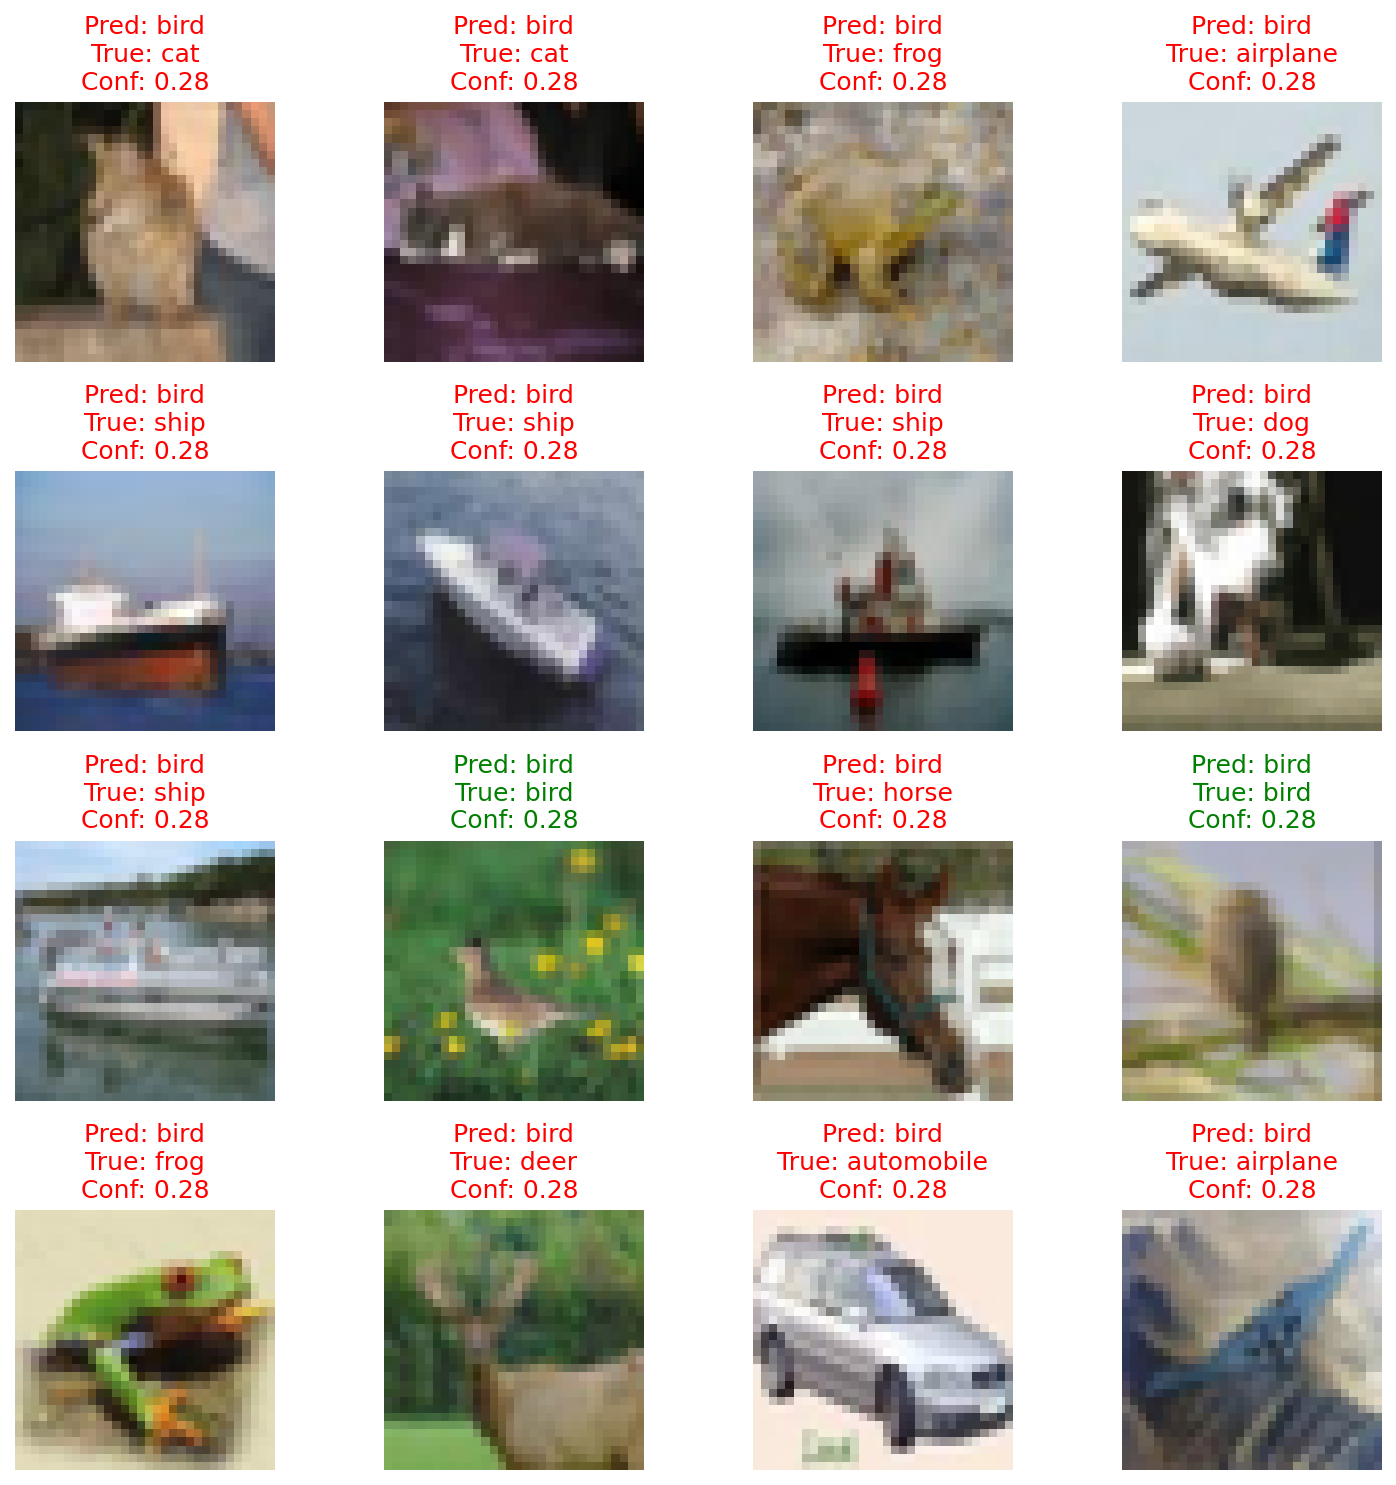

In [ ]:
plot_samples(images, labels, confs, preds)

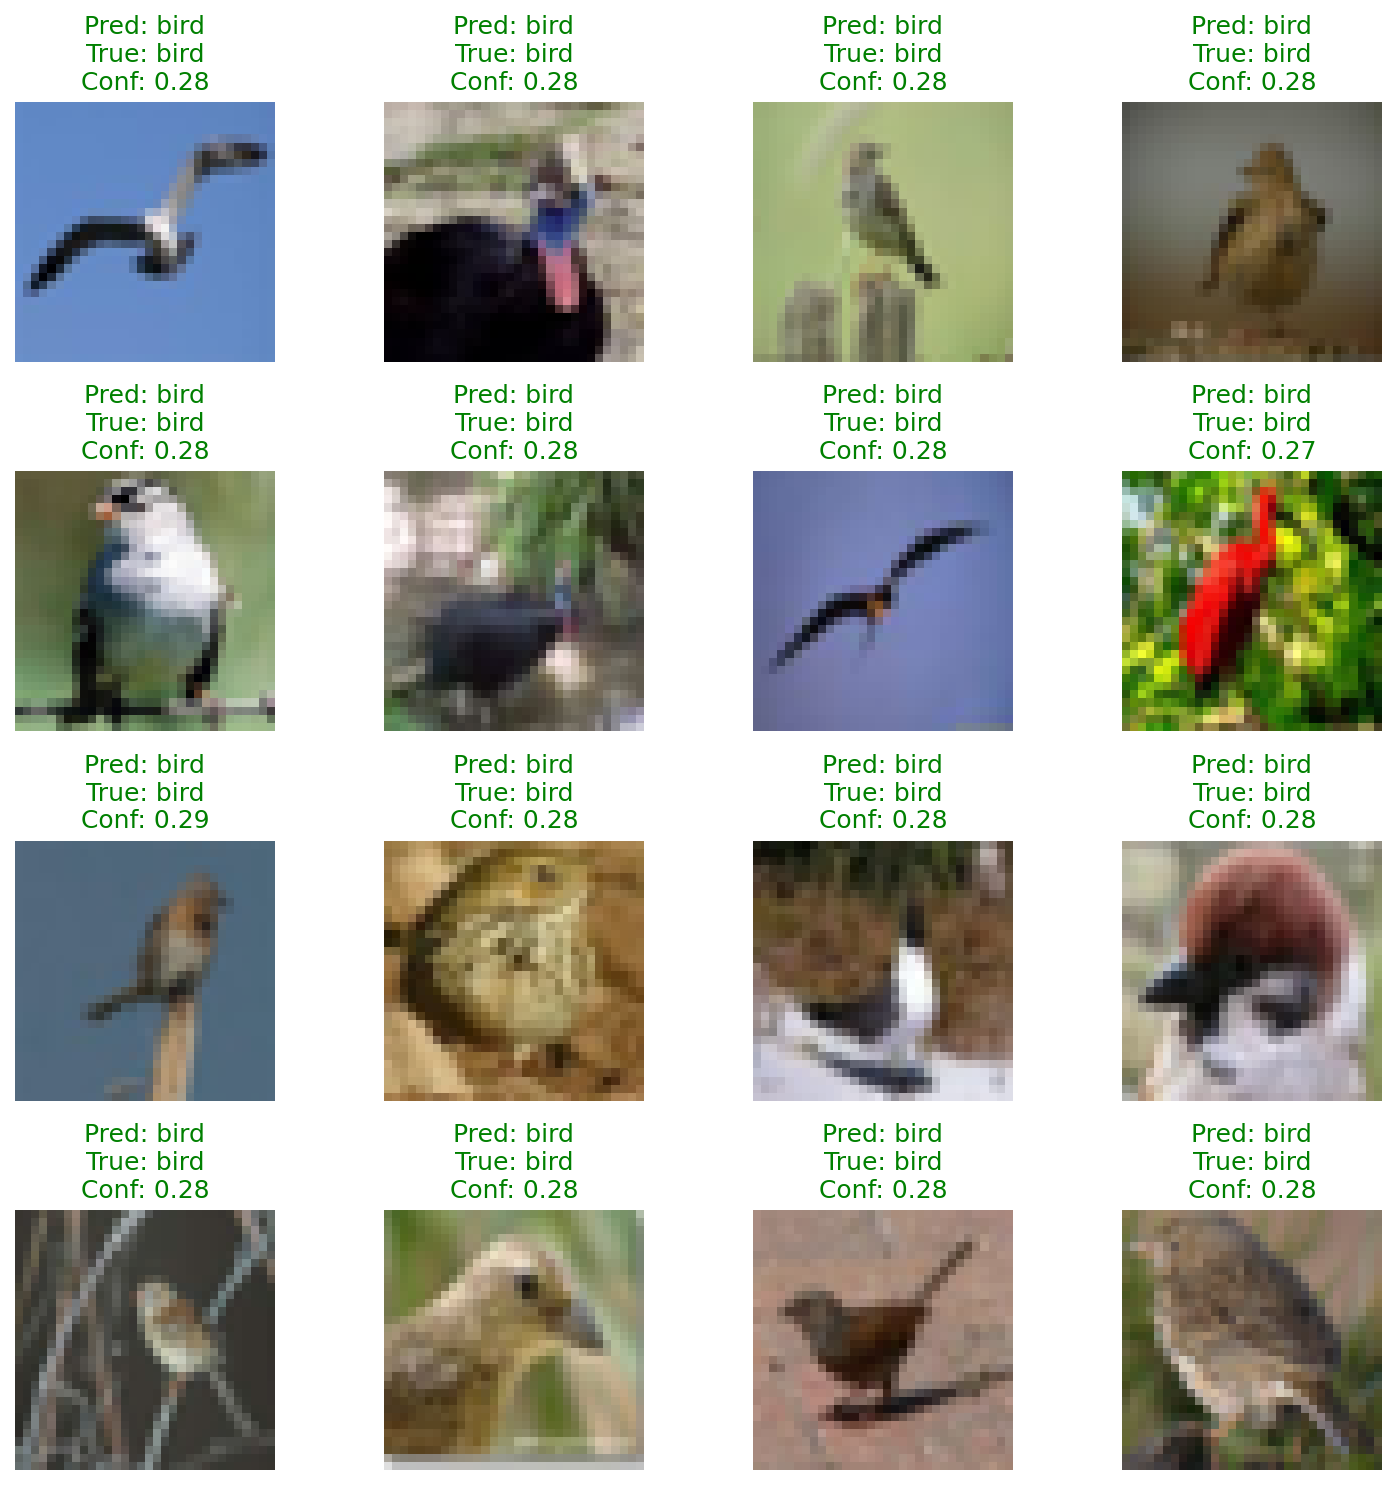

In [ ]:
# underconfident samples but correct
underconfident_correct = np.logical_and(preds == gts, confs.max(1) < 0.3)
plot_samples(
    images[underconfident_correct],
    labels[underconfident_correct],
    confs[underconfident_correct],
    preds[underconfident_correct],
)
